In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq
from scipy import arange

from sklearn import preprocessing
import pandas as pd
from fastdtw import fastdtw
import pandas as pd
from scipy import signal
from python_speech_features import mfcc, logfbank
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from numpy import zeros, newaxis



import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM, Embedding
from keras import optimizers



from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
#from keras.utils import np_utils
from sklearn import metrics 

#from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.


In [83]:
num_labels = 5
model = Sequential()

model.add(LSTM(256,return_sequences=True,batch_input_shape = (None,13, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.001))
        #model1.add(Flatten())

model.add(LSTM(128,return_sequences= True ))
model.add(Activation('relu'))
model.add(Dropout(0.001))
        #model1.add(Flatten())


model.add(LSTM(128,return_sequences= True ))
model.add(Activation('relu'))
model.add(Dropout(0.001))
model.add(Flatten())


model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.001))

        #model1.add(Dense(3, activation='softmax'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.save('simple_mlp.h5')

In [82]:
class Voice_Recognition:
    def Mfcc_Data(file,label):
        rate, sig = read(file)
        sig = pd.DataFrame(sig)
        sig = sig[0]
        '''plt.plot(sig)
        plt.show()'''
        
        #sig = Voice_Recognition.collect_only_word(sig) # collection only word
        e  =[]
        for i in range(sig.shape[0]):
            #l = l+1
            if(sig[i] > 10000 or sig[i]< -10000):
                for j in range(i-1000, i+19000,1):
                    e.append(sig[j])
                break
        '''plt.plot(e)
        plt.show()'''
        
        
        t = 0
        coll = []
        sig = pd.DataFrame(e)
        for k in range(t,len(sig),t+2000):
            print(type(sig))
            mfcc1 = mfcc(sig[k:k+2000],rate,nfilt = 32, nfft = 1103)
            mfcc11 = pd.DataFrame(mfcc1)
            mfcc11 = mfcc11.dropna()
            mfcc11['label'] = label
            mfcc11 = pd.DataFrame(mfcc11)
            coll.append(mfcc11)
            del mfcc1
            del mfcc11
        mfcc1 = pd.concat(coll,axis = 0, ignore_index = True)
        mfcc1 = pd.DataFrame(mfcc1)
        print('final end mfcc  data',len(mfcc1))
        return(mfcc1)
    
    
    
    def WordData_Collection(file1, file2, file3):
        D = [file1, file2, file3]
        result_h = pd.concat(D,ignore_index=True)
        #print(mfcc1.shape)
        print(result_h.shape)
        return(result_h)
    
    def Final_Data(full_data,name):
        #DDD = [f1, f2, f3]
        DATA = pd.concat(full_data,ignore_index=True)
        DATA.to_csv(str(name) +'.csv')
        print(DATA.shape)
        return(DATA)
    
    def Rnn():
    
        num_labels = 5
        model = Sequential()

        model.add(LSTM(256,return_sequences=True,batch_input_shape = (None,13, 1)))
        model.add(Activation('relu'))
        model.add(Dropout(0.001))
        #model1.add(Flatten())

        model.add(LSTM(128,return_sequences= True ))
        model.add(Activation('relu'))
        model.add(Dropout(0.001))
        #model1.add(Flatten())


        model.add(LSTM(128,return_sequences= True ))
        model.add(Activation('relu'))
        model.add(Dropout(0.001))
        model.add(Flatten())


        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.001))

        #model1.add(Dense(3, activation='softmax'))
        model.add(Dense(num_labels))
        model.add(Activation('softmax'))

        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
        model.save('simple_mlp.h5')
        return(model1)



In [47]:
class Data_Prepare():
    def TrainData_Prepare(train_data):
        trainDATA = pd.read_csv(train_data) 

        trainDATA = trainDATA.ix[:,1:]
        ## Train data 
        x = trainDATA.ix[: ,:-1]
        x = pd.DataFrame(x)
        print('orig train data shape',x.shape)
        #from numpy import zeros, newaxis
        x = np.array(x, dtype = float)
        x = x[:, :, newaxis]
        print('new shape of train data',x.shape)

        y = trainDATA.ix[:,-1]
        print('new shape of train data',y.shape)

        lb = LabelEncoder()
        y = np_utils.to_categorical(lb.fit_transform(y)) 
        y = pd.DataFrame(y)
        # extra
        '''y = np.array(y, dtype = float)
        y = y[:, :, newaxis]'''
        print('train label data shape',y.shape)
        return(x,y)
    
    def TestData_Prepare(test_data):
        te = pd.read_csv(test_data)
        te = te.ix[:,1:]
        ## Test Data
        x_test = te.ix[: ,:-1]
        x_test = pd.DataFrame(x_test)
        print('orig shape of test data',x_test.shape)
        #from numpy import zeros, newaxis
        x_test = np.array(x_test, dtype = float)
        x_test = x_test[:, :, newaxis]
        print('new shape of test data',x_test.shape)
        
        y_test = te.ix[:,-1]
        lb = LabelEncoder()
        y_test = np_utils.to_categorical(lb.fit_transform(y_test))
        y_test = pd.DataFrame(y_test)
        print(y_test.shape)
        #from numpy import zeros, newaxis
        '''y_test = np.array(y_test, dtype = float)
        y_test = y_test[:, :, newaxis]'''
        print('test label data shape',y_test.shape)
        return(x_test, y_test)

## ringtone train data

In [13]:
rate, sig = read('ringtone1.wav')
sig = pd.DataFrame(sig)
sig = sig[0]
'''plt.plot(sig)
plt.show()'''
print(len(sig))
c = 0
end_data = []
for o in range(c,len(sig),c+2000):
    print('i ->',o,o+2000)
    sig1 = sig[o:o+2000]
    #print(sig1.shape)
    sig1 = pd.DataFrame(sig1)

    mfcc_r11 = mfcc(sig1,rate,nfilt = 32, nfft = 1103)
    #print(mfcc_r11.shape)

    mfcc_r1 = pd.DataFrame(mfcc_r11)
    mfcc_r1 = mfcc_r1.dropna()
    #print(mfcc_r1.shape)

    
    mfcc_r1['label'] = 5 
    print('end mfcc data shape',mfcc_r1.shape)
    
    mfcc_r1 = pd.DataFrame(mfcc_r1)

    end_data.append(mfcc_r1) 
    #end_data = pd.DataFrame(end_data)
    #print('end_data', len(end_data))
    mfcc_r1 = []

    del mfcc_r1
    #print(mfcc_r1.shape)
endd_data = pd.concat(end_data,axis = 0, ignore_index = True)
endd_data = pd.DataFrame(endd_data)
print('final end mfcc  data',len(endd_data))

485100
i -> 0 2000
end mfcc data shape (5, 14)
i -> 2000 4000
end mfcc data shape (5, 14)
i -> 4000 6000
end mfcc data shape (5, 14)
i -> 6000 8000
end mfcc data shape (5, 14)
i -> 8000 10000
end mfcc data shape (5, 14)
i -> 10000 12000
end mfcc data shape (5, 14)
i -> 12000 14000
end mfcc data shape (5, 14)
i -> 14000 16000
end mfcc data shape (5, 14)
i -> 16000 18000
end mfcc data shape (5, 14)
i -> 18000 20000
end mfcc data shape (5, 14)
i -> 20000 22000
end mfcc data shape (5, 14)
i -> 22000 24000
end mfcc data shape (5, 14)
i -> 24000 26000
end mfcc data shape (5, 14)
i -> 26000 28000
end mfcc data shape (5, 14)
i -> 28000 30000
end mfcc data shape (5, 14)
i -> 30000 32000
end mfcc data shape (5, 14)
i -> 32000 34000
end mfcc data shape (5, 14)
i -> 34000 36000
end mfcc data shape (5, 14)
i -> 36000 38000
end mfcc data shape (5, 14)
i -> 38000 40000
end mfcc data shape (5, 14)
i -> 40000 42000
end mfcc data shape (5, 14)
i -> 42000 44000
end mfcc data shape (5, 14)
i -> 44000 4600

end mfcc data shape (5, 14)
i -> 360000 362000
end mfcc data shape (5, 14)
i -> 362000 364000
end mfcc data shape (5, 14)
i -> 364000 366000
end mfcc data shape (5, 14)
i -> 366000 368000
end mfcc data shape (5, 14)
i -> 368000 370000
end mfcc data shape (5, 14)
i -> 370000 372000
end mfcc data shape (5, 14)
i -> 372000 374000
end mfcc data shape (5, 14)
i -> 374000 376000
end mfcc data shape (5, 14)
i -> 376000 378000
end mfcc data shape (5, 14)
i -> 378000 380000
end mfcc data shape (5, 14)
i -> 380000 382000
end mfcc data shape (5, 14)
i -> 382000 384000
end mfcc data shape (5, 14)
i -> 384000 386000
end mfcc data shape (5, 14)
i -> 386000 388000
end mfcc data shape (5, 14)
i -> 388000 390000
end mfcc data shape (5, 14)
i -> 390000 392000
end mfcc data shape (5, 14)
i -> 392000 394000
end mfcc data shape (5, 14)
i -> 394000 396000
end mfcc data shape (5, 14)
i -> 396000 398000
end mfcc data shape (5, 14)
i -> 398000 400000
end mfcc data shape (5, 14)
i -> 400000 402000
end mfcc data

## Collect Train Data

In [53]:
d1 = Voice_Recognition.Mfcc_Data('hh1.wav',1)
d2= Voice_Recognition.Mfcc_Data('hh5.wav',1)
d3 = Voice_Recognition.Mfcc_Data('hh4.wav',1)
result_h = Voice_Recognition.WordData_Collection(d1, d2, d3)

d1 = Voice_Recognition.Mfcc_Data('oo3.wav',2)
d2= Voice_Recognition.Mfcc_Data('oo4.wav',2)
d3 = Voice_Recognition.Mfcc_Data('ok1.wav',2)
result_ok = Voice_Recognition.WordData_Collection(d1, d2, d3)

d1 = Voice_Recognition.Mfcc_Data('delete1.wav',3)
d2= Voice_Recognition.Mfcc_Data('delete2.wav',3)
d3 = Voice_Recognition.Mfcc_Data('delete3.wav',3)
result_delete = Voice_Recognition.WordData_Collection(d1, d2, d3)

d1 = Voice_Recognition.Mfcc_Data('speaker1.wav',4)
d2= Voice_Recognition.Mfcc_Data('speaker2.wav',4)
d3 = Voice_Recognition.Mfcc_Data('speaker3.wav',4)
result_speaker = Voice_Recognition.WordData_Collection(d1, d2, d3)

dd = [result_h, result_ok ,result_delete, result_speaker, endd_data]
Data = Voice_Recognition.Final_Data(dd,'train_data')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
final end mfcc  data 50
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
final end mfcc  data 50
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<c

## test ringtone

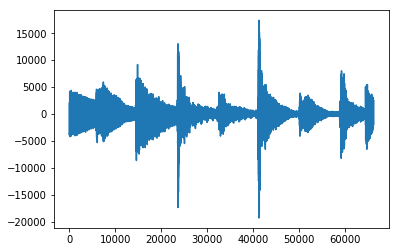

20000


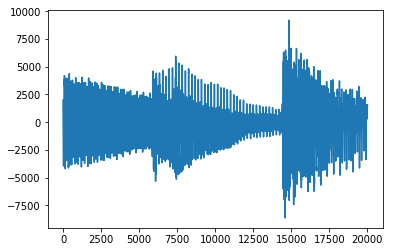

(42, 14)


In [41]:
rate, sig = read('ringtone5.wav')
sig = pd.DataFrame(sig)
sig = sig[0]
plt.plot(sig)
plt.show()
sig = sig[:20000]
print(len(sig))
plt.plot(sig)
plt.show()


mfcc_feat = mfcc(sig,rate,nfilt = 32, nfft = 1103)
mfcc_t5 = pd.DataFrame(mfcc_feat)
mfcc_t5 = mfcc_t5.dropna()
#print(len(mfcc_t4))


mfcc_t5['label'] = 5
print(mfcc_t5.shape)

In [54]:
d1 = Voice_Recognition.Mfcc_Data('hello1.wav',1)
d2 = Voice_Recognition.Mfcc_Data('oo5.wav',2)
d3 = Voice_Recognition.Mfcc_Data('delete1.wav',3)
d4 = Voice_Recognition.Mfcc_Data('speaker3.wav',4)

dd = [d1, d2, d3, d4, mfcc_t5 ]
Data = Voice_Recognition.Final_Data(dd,'test_data')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
final end mfcc  data 50
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
final end mfcc  data 50
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<c

In [55]:
x,y = Data_Prepare.TrainData_Prepare('train_data.csv')

x_test,y_test = Data_Prepare.TrainData_Prepare('test_data.csv')

orig train data shape (1810, 13)
new shape of train data (1810, 13, 1)
new shape of train data (1810,)
train label data shape (1810, 5)
orig train data shape (242, 13)
new shape of train data (242, 13, 1)
new shape of train data (242,)
train label data shape (242, 5)


/home/navneet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/navneet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/navneet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [56]:
model = Voice_Recognition.Rnn()
m1 = model.fit(x,y, batch_size=20, epochs=10, validation_data=(x_test,y_test))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1810 samples, validate on 242 samples
Epoch 1/10
1810/1810 [==============================] - 11s 6ms/step - loss: 0.9785 - acc: 0.6685 - val_loss: 1.8506 - val_acc: 0.1983
Epoch 2/10
1810/1810 [==============================] - 8s 4ms/step - loss: 0.6289 - acc: 0.7464 - val_loss: 1.7452 - val_acc: 0.4545
Epoch 3/10
1810/1810 [==============================] - 7s 4ms/step - loss: 0.4140 - acc: 0.8514 - val_loss: 1.5890 - val_acc: 0.5289
Epoch 4/10
1810/1810 [==============================] - 8s 4ms/step - loss: 0.3433 - acc: 0.8757 - val_loss: 1.1450 - val_acc: 0.6612
Epoch 5/10
1810/1810 [==============================] - 8s 4ms/step - loss: 0.2434 - acc: 0.9199 - val_loss: 1.0841 - val_acc: 0.7149
Epoch 6/10
1810/1810 [=========================

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13, 256)           264192    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 256)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 13, 128)           197120    
_________________________________________________________________
activation_2 (Activation)    (None, 13, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 13, 128)           131584    
__________

## check

In [77]:
import pyaudio
import wave
 
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "jj.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print ("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print( "finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...
finished recording


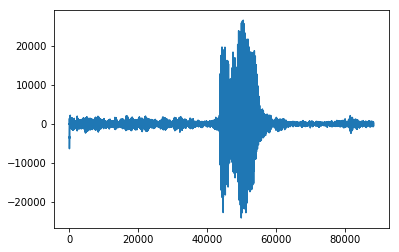

max, min 2229 -6349


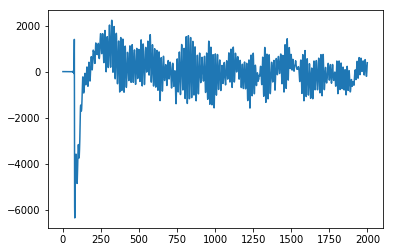

hello value 0.061609215917997055
ok value 2.088270206004381
delete value 0.05600275791948662
speaker value 4.020859058946371
ringtone value 93.77325773239136
max, min 2002 -1772


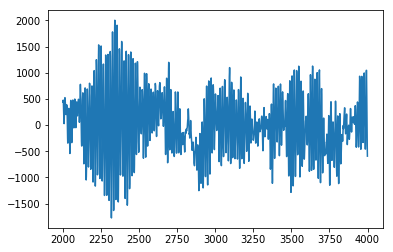

hello value 0.056104081450030215
ok value 1.4391038985922933
delete value 0.39611499174498027
speaker value 7.242021411657333
ringtone value 90.86665868759155
max, min 1866 -2333


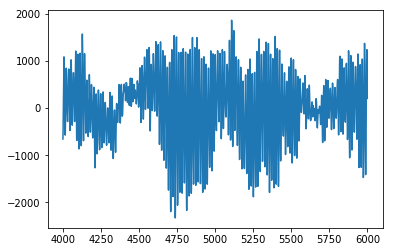

hello value 0.005919121504120994
ok value 0.7735824270639569
delete value 0.008884766771188879
speaker value 0.31142818508669734
ringtone value 98.90018582344055
max, min 1700 -1571


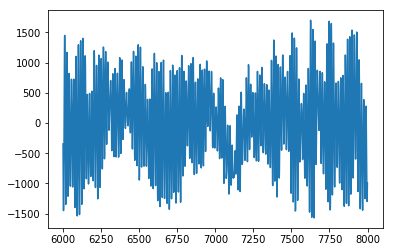

hello value 0.012079835287295282
ok value 0.7038389798253775
delete value 0.03917774971341714
speaker value 0.508320209919475
ringtone value 98.73658537864685
max, min 1969 -2030


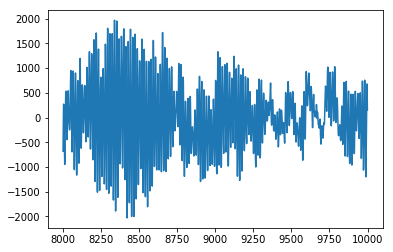

hello value 0.03829611683613621
ok value 1.5372831211425364
delete value 0.08296813117340207
speaker value 0.4959615669213236
ringtone value 97.84548878669739
max, min 1369 -1238


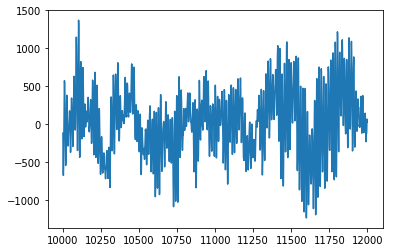

hello value 0.09457174804992974
ok value 5.700742788612843
delete value 0.14282372721936554
speaker value 6.168261291459203
ringtone value 87.89360284805298
max, min 1675 -1415


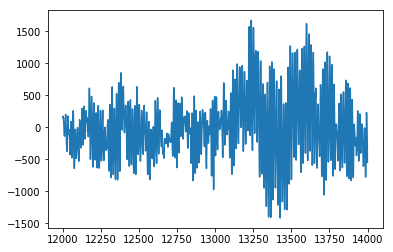

hello value 0.040914421842899173
ok value 2.4561195983551443
delete value 0.23681009479332715
speaker value 2.487758845090866
ringtone value 94.77840065956116
max, min 1296 -1215


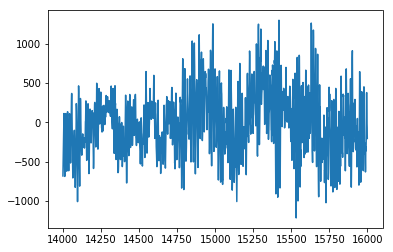

hello value 0.053056832985021174
ok value 1.614407335873693
delete value 0.15114960609935224
speaker value 3.5768875293433666
ringtone value 94.60449576377869
max, min 2126 -1728


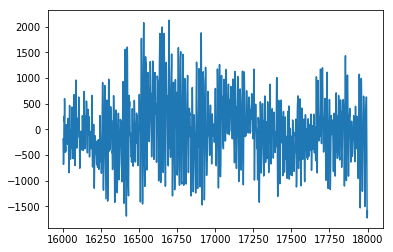

hello value 0.0031308297729992773
ok value 0.0303704618863776
delete value 0.01331978928647004
speaker value 0.13187378128350247
ringtone value 99.82130527496338
max, min 1774 -1655


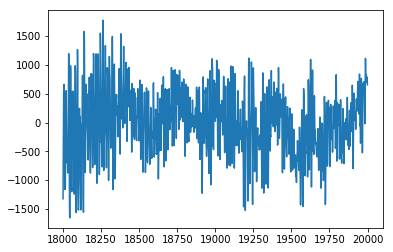

hello value 0.0008914575585095007
ok value 0.0031577005196936625
delete value 0.0052721850624948274
speaker value 0.015514588449150324
ringtone value 99.9751615524292
max, min 1805 -1960


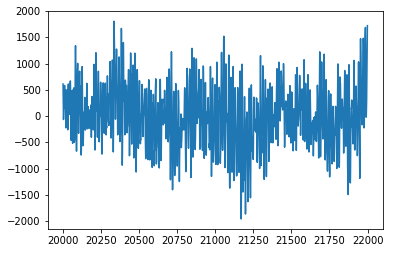

hello value 0.000304403349673521
ok value 0.000650395197681064
delete value 0.0012648921619984321
speaker value 0.006449771099141799
ringtone value 99.99133110046387
max, min 2027 -1914


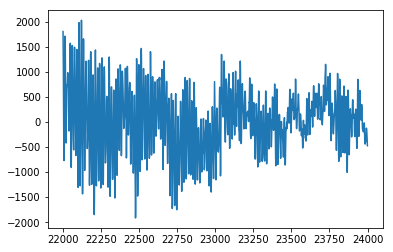

hello value 0.0006030723898220458
ok value 0.001733287517708959
delete value 0.0015669676213292405
speaker value 0.010204669742961414
ringtone value 99.98589396476746
max, min 1177 -1172


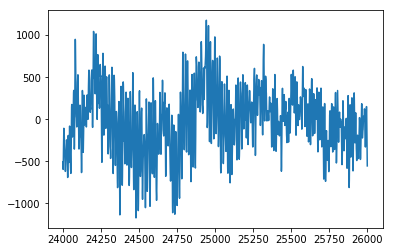

hello value 0.0030739490739506437
ok value 0.06765575113604427
delete value 0.000805099034550949
speaker value 1.0942187666660175
ringtone value 98.83424878120422
max, min 1781 -1592


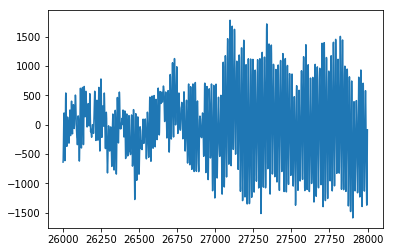

hello value 0.04204124619718641
ok value 0.7820865139365196
delete value 0.10824898665305227
speaker value 8.69087215512991
ringtone value 90.37675023078918
max, min 1359 -1113


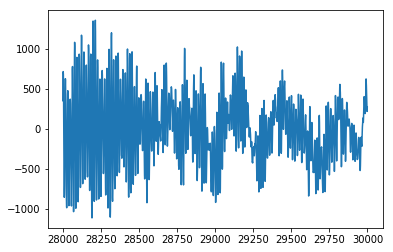

hello value 0.05550690751988441
ok value 1.2416174076497555
delete value 0.039495824894402176
speaker value 40.55742904543877
ringtone value 58.10595244169235
max, min 1663 -1737


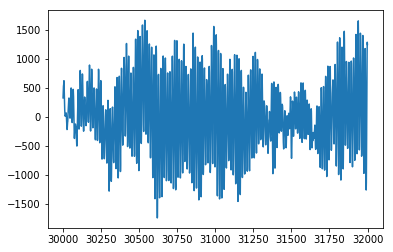

hello value 0.018583181299618445
ok value 0.6877586722839624
delete value 0.061508222424890846
speaker value 0.5748122138902545
ringtone value 98.65733742713928
max, min 1880 -2118


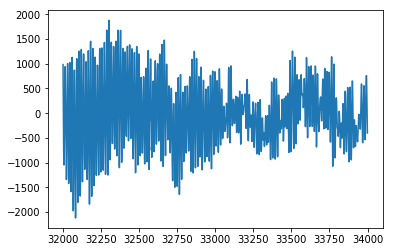

hello value 0.003508403897285461
ok value 6.868133209645748
delete value 0.0004336444771979586
speaker value 0.06211166211869568
ringtone value 93.06581377983093
max, min 1502 -1243


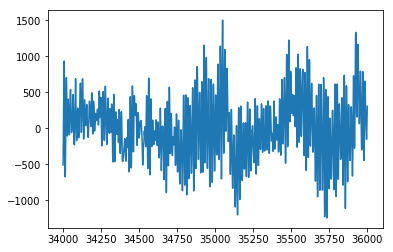

hello value 0.03700374189065769
ok value 3.988100364804268
delete value 0.017320619444944896
speaker value 2.635620622895658
ringtone value 93.32195520401001
max, min 974 -853
max, min 809 -924
max, min 913 -1064


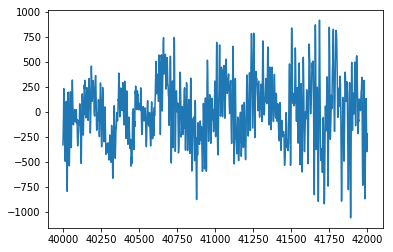

hello value 0.02746163012034231
ok value 5.526153482060181
delete value 0.000971563542293552
speaker value 88.55851113796234
ringtone value 5.886903798091225
max, min 17580 -10966


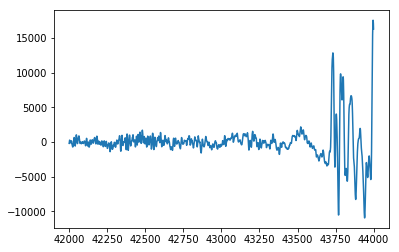

hello value 18.273165659047663
ok value 8.54258701147046
delete value 0.010820689358297386
speaker value 38.23265854269266
ringtone value 34.940767191001214
max, min 19748 -22738


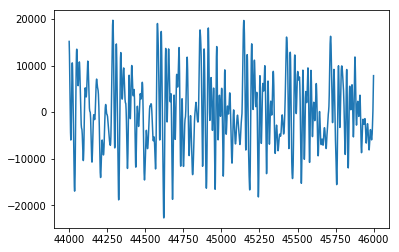

hello value 87.31768012046814
ok value 8.016033619642258
delete value 0.9657638019780279
speaker value 2.9619546073081437
ringtone value 0.7385672838427126
max, min 18437 -16191


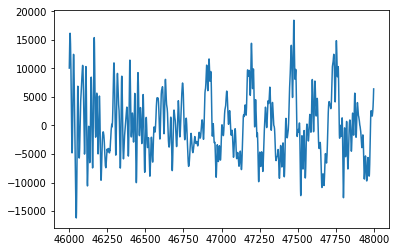

hello value 71.53456747531891
ok value 2.7774207876063883
delete value 14.382131525198929
speaker value 8.309836473854375
ringtone value 2.9960440029390156
max, min 25941 -24131


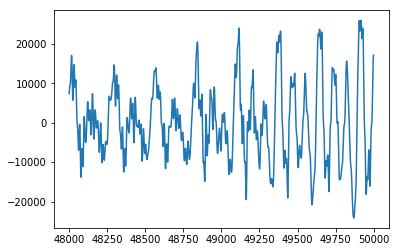

hello value 98.66379499435425
ok value 0.026080929455929436
delete value 0.1370262142881984
speaker value 0.08467601298434602
ringtone value 1.0884153530059848
max, min 26628 -22798


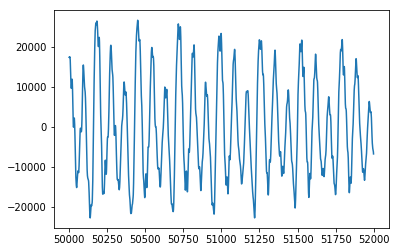

hello value 94.74228143692017
ok value 1.6260369605151936
delete value 0.007830005381208593
speaker value 0.023224300966830924
ringtone value 3.6006316734710704
max, min 19802 -17390


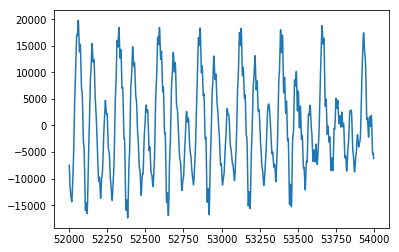

hello value 95.75912714004517
ok value 3.797125052660703
delete value 0.0012595189519970518
speaker value 0.06212482517639727
ringtone value 0.3803618377423845
max, min 15209 -9091


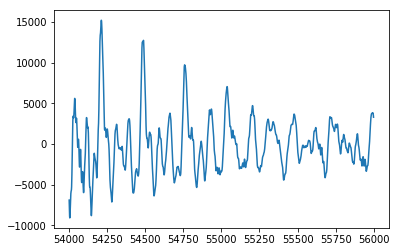

hello value 26.305142194032673
ok value 61.73216104507446
delete value 0.001194845884526785
speaker value 0.9367960947793108
ringtone value 11.024709863122553
max, min 3371 -3577


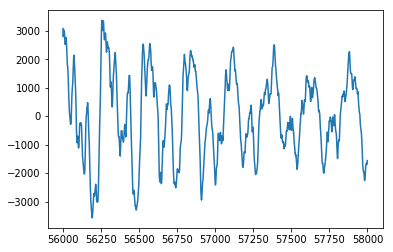

hello value 82.34857678413391
ok value 15.5007129535079
delete value 0.0005907206389110797
speaker value 1.719278291311639
ringtone value 0.43084278411697596
max, min 2209 -2036


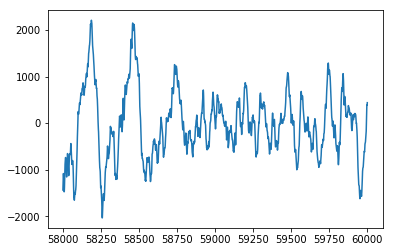

hello value 69.87725257873535
ok value 8.004805594682693
delete value 0.005806481622130377
speaker value 17.838425647933036
ringtone value 4.273708937689662
max, min 1692 -1928


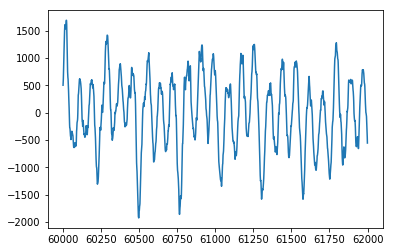

hello value 78.01269114017487
ok value 1.4539972133934498
delete value 0.12884036674222443
speaker value 0.3233256479143165
ringtone value 20.08114218711853
max, min 1279 -1455


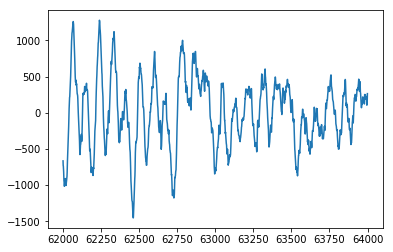

hello value 44.6038892865181
ok value 3.856725320219993
delete value 4.882130101323128
speaker value 3.416347089514602
ringtone value 43.24090778827667
max, min 688 -713
max, min 865 -881
max, min 795 -998
max, min 769 -680
max, min 626 -849
max, min 615 -859
max, min 914 -726
max, min 1276 -1023


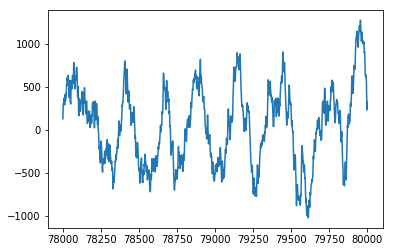

hello value 0.7718630651288549
ok value 11.892059874080587
delete value 0.21420153992949054
speaker value 11.706879579578526
ringtone value 75.41499555110931
max, min 2145 -2399


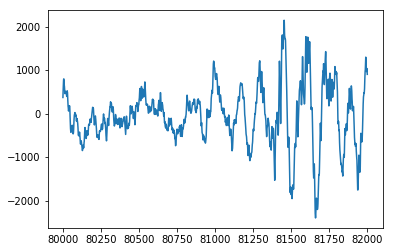

hello value 2.153612000402063
ok value 1.1078397859819233
delete value 0.031122444197535515
speaker value 19.606278943231246
ringtone value 77.10114563349634
max, min 1666 -1491


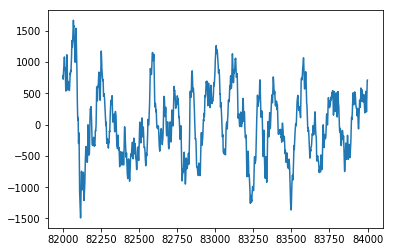

hello value 32.992654140107334
ok value 4.717708075186238
delete value 0.13100197567837313
speaker value 0.44264424817811227
ringtone value 61.715993881225586
max, min 859 -1007


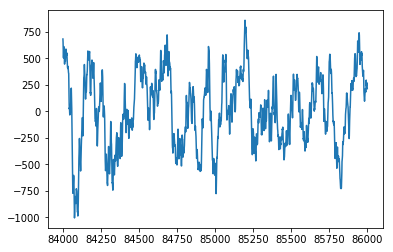

hello value 0.3979090615757741
ok value 0.425492359790951
delete value 1.3356162374839187
speaker value 7.178566076327115
ringtone value 90.66241502761841
max, min 826 -908
max, min 567 -730


In [78]:
c = 0
r11 = []
r22 = []
r33 = []
r44 = []
r55 = []
indd = []
rate, sigg = read('hh1.wav')
sigg = pd.DataFrame(sigg)
sigg = sigg[0]

plt.plot(sigg)
plt.show()

#print('orig len of sig',len(sig))
for i in range(c,len(sigg),c+2000):
    sig = sigg[i:i+2000]
    
    maxx = np.max(sig)
    minn = np.min(sig)
    print('max, min',maxx,minn)
    if(maxx > 1000 or minn< -1000):
        plt.plot(sig)
        plt.show()
        # find MFCC
        #print(sig)
        sig = pd.DataFrame(sig)
        sig.index = np.arange(1, len(sig)+1)
        mfcc_feat = mfcc(sig,rate,nfilt = 32, nfft = 1103)
        x_test = pd.DataFrame(mfcc_feat)
        x_test = x_test.dropna()
        x_test = np.array(x_test, dtype = float)
        x_test = x_test[:, :, newaxis]
        ynew = model.predict(x_test)
        #matrix = metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))

        yL = list(ynew)
        yl = pd.DataFrame(yL)
        #print(yl.shape)
        print('hello value',(yl[0].mean())*100)
        print('ok value',(yl[1].mean())*100)
        print('delete value',(yl[2].mean())*100)
        print('speaker value',(yl[3].mean())*100)
        print('ringtone value',(yl[4].mean())*100)

        r11.append(int((yl[0].mean())*100))
        r22.append(int((yl[1].mean())*100))
        r33.append(int((yl[2].mean())*100))
        r44.append(int((yl[3].mean())*100))
        r55.append(int((yl[4].mean())*100))
        indd.append(int(i/2000))
              
        
    x_test = []  
    mfcc_feat = []
    sig = 0


In [79]:
r1 = pd.DataFrame(r11)
r2 = pd.DataFrame(r22)
r3 = pd.DataFrame(r33)

r4 = pd.DataFrame(r44)
r5 = pd.DataFrame(r55)

ind = pd.DataFrame(indd)
rr = [ ind, r1, r2, r3 , r4, r5]
result = pd.concat(rr,ignore_index=True, axis = 1)
result.columns = ['index','hello', 'ok', 'delete', 'speaker', 'ringtone']

In [80]:
print(result.to_string()) ## show whole data
print('hello     value',result['hello'].mean())
print('Ok        value',result['ok'].mean())
print('Delete    value',result['delete'].mean())
print('speaker  value',result['speaker'].mean())
print('ringtone  value',result['ringtone'].mean())



    index  hello  ok  delete  speaker  ringtone
0       0      0   2       0        4        93
1       1      0   1       0        7        90
2       2      0   0       0        0        98
3       3      0   0       0        0        98
4       4      0   1       0        0        97
5       5      0   5       0        6        87
6       6      0   2       0        2        94
7       7      0   1       0        3        94
8       8      0   0       0        0        99
9       9      0   0       0        0        99
10     10      0   0       0        0        99
11     11      0   0       0        0        99
12     12      0   0       0        1        98
13     13      0   0       0        8        90
14     14      0   1       0       40        58
15     15      0   0       0        0        98
16     16      0   6       0        0        93
17     17      0   3       0        2        93
18     20      0   5       0       88         5
19     21     18   8       0       38   

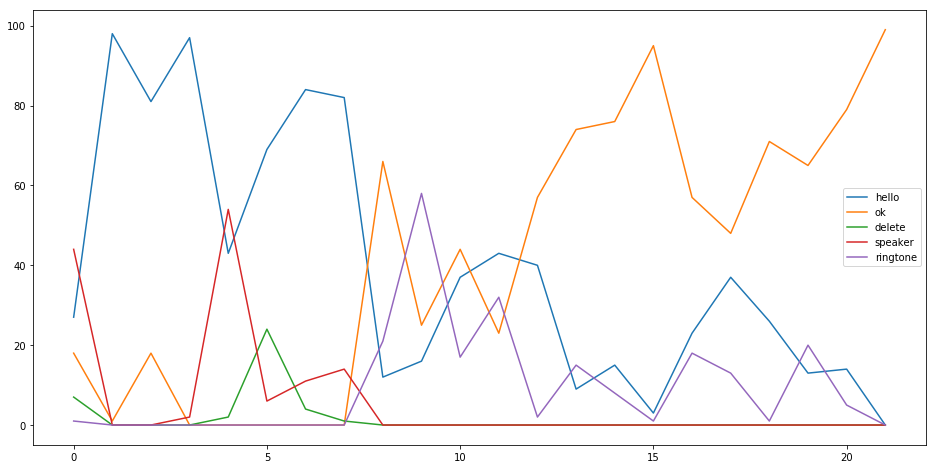

In [54]:
plt.figure(figsize = (16,8))
plt.plot(r1, label = "hello")
#plt.show()
plt.plot(r2, label = 'ok')
plt.plot(r3, label = 'delete')
plt.plot(r4, label = 'speaker')
plt.plot(r5, label = 'ringtone')
plt.legend()
plt.show()


In [65]:
hello = ok = delete= ringtone = speaker =  0
index_col = []
for h in range(0,len(result)):
    #print(np.array(result.ix[h:h,1:]))
    ii = np.array(result.ix[h:h,1:])
    c = ii.flatten()
    #print(c)
    mmm = np.max(np.array(result.ix[h:h,1:]))
    #ii = pd.DataFrame(ii)
    #print('max value is ->', mmm)
    val = (np.where(c == mmm)[0])
    index_col.append(val[0])
    #print('index of max value is ->',val)
    if(mmm>50):
        #print('OPEN')
        if(val == 0):
            hello = hello+1
            if(hello>4):
                print('HELLO')
                break
        elif(val == 1):
            ok = ok+1
            if(ok>4):
                print('OK')
                break
        elif(val == 2):
            delete = delete+1
            if(delete>4):
                print('DELETE')
                break
        elif(val == 3):
            speaker = speaker+1
            if(speaker>4):
                print('SPEAKER')
                
        else:
            ringtone = ringtone+1
            if(ringtone>4):
                print('RINGTONE')
                break
            
        
        
    #print('***********************************************************')
#print(index_col)
    

OK


/home/navneet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/navneet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [245]:
rate, sigg = read('file.wav')
sigg = pd.DataFrame(sigg)
sig = sigg[0]
mfcc_feat = mfcc(sig,rate,nfilt = 32, nfft = 1103)
x_test = pd.DataFrame(mfcc_feat)
x_test = x_test.dropna()
x_test = np.array(x_test, dtype = float)
x_test = x_test[:, :, newaxis]
ynew = model.predict(x_test)
yy = pd.DataFrame(ynew)

In [246]:
print(yy.to_string())

            0         1         2
0    0.412699  0.447278  0.140023
1    0.376917  0.452126  0.170958
2    0.330539  0.495243  0.174218
3    0.206624  0.583523  0.209853
4    0.254946  0.528490  0.216565
5    0.307584  0.473572  0.218844
6    0.277583  0.521992  0.200425
7    0.145987  0.596208  0.257805
8    0.280878  0.531972  0.187151
9    0.273301  0.529490  0.197209
10   0.347578  0.474142  0.178279
11   0.198079  0.565220  0.236700
12   0.328397  0.498650  0.172953
13   0.391572  0.463922  0.144506
14   0.293976  0.498290  0.207734
15   0.553280  0.320883  0.125837
16   0.290546  0.532336  0.177117
17   0.282858  0.525228  0.191914
18   0.282990  0.495879  0.221131
19   0.296907  0.502712  0.200382
20   0.289853  0.527509  0.182638
21   0.341918  0.402574  0.255507
22   0.302240  0.485383  0.212377
23   0.227566  0.536964  0.235470
24   0.263242  0.442542  0.294216
25   0.288859  0.339140  0.372001
26   0.411465  0.394207  0.194329
27   0.239465  0.523780  0.236755
28   0.416237 

In [247]:
print(yy[0].mean())
print(yy[1].mean())
print(yy[2].mean())

0.40841034054756165
0.37247878313064575
0.21911096572875977


In [205]:
from sklearn.metrics import confusion_matrix, classification_report
#print(confusion_matrix(y_test, pr_lr))
#print(classification_report(y_test, ynew))


In [218]:
ynew = model.predict(x_test)
#print(type(ynew))

IndexError: list index out of range

In [227]:
ynew

array([[  1.85809284e-01,   8.14130843e-01,   5.99141313e-05],
       [  2.85102606e-01,   7.14867353e-01,   2.99831427e-05],
       [  8.76571357e-01,   1.23325609e-01,   1.03034174e-04],
       [  1.26052007e-01,   8.73906732e-01,   4.12909758e-05],
       [  9.27230835e-01,   7.26525858e-02,   1.16619987e-04]], dtype=float32)

In [228]:
import array as arr

numbers_list = ([[1, 0, 0]])
#y_test = np.array(numbers_list)

In [230]:
ynew.argmax(axis=1)

array([1, 1, 0, 1, 0])

In [229]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))


AxisError: axis 1 is out of bounds for array of dimension 1

In [298]:
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(sequence.shape)
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
print(sequence)
print(sequence.shape)

(9,)
[[[ 0.1]
  [ 0.2]
  [ 0.3]
  [ 0.4]
  [ 0.5]
  [ 0.6]
  [ 0.7]
  [ 0.8]
  [ 0.9]]]
(1, 9, 1)


In [295]:
sequence

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9]]])

In [293]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array(x)
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
#print(n_in.shape)
seq_in = seq_in.reshape((1, x.shape, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)

TypeError: 'tuple' object cannot be interpreted as an integer